# **Pre-Requisites**

In [1]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.2 MB/s eta 0:00:00


In [2]:
# Libraries used

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter, show
import pandas as pd
from numpy import unique, where
from sklearn.datasets import make_classification, make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation, MeanShift, OPTICS, AgglomerativeClustering
import skfuzzy as fuzz

In [3]:
# Load the dataset

df=pd.read_csv("data.csv")
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


# **Data Visualisation and EDA**

<Axes: >

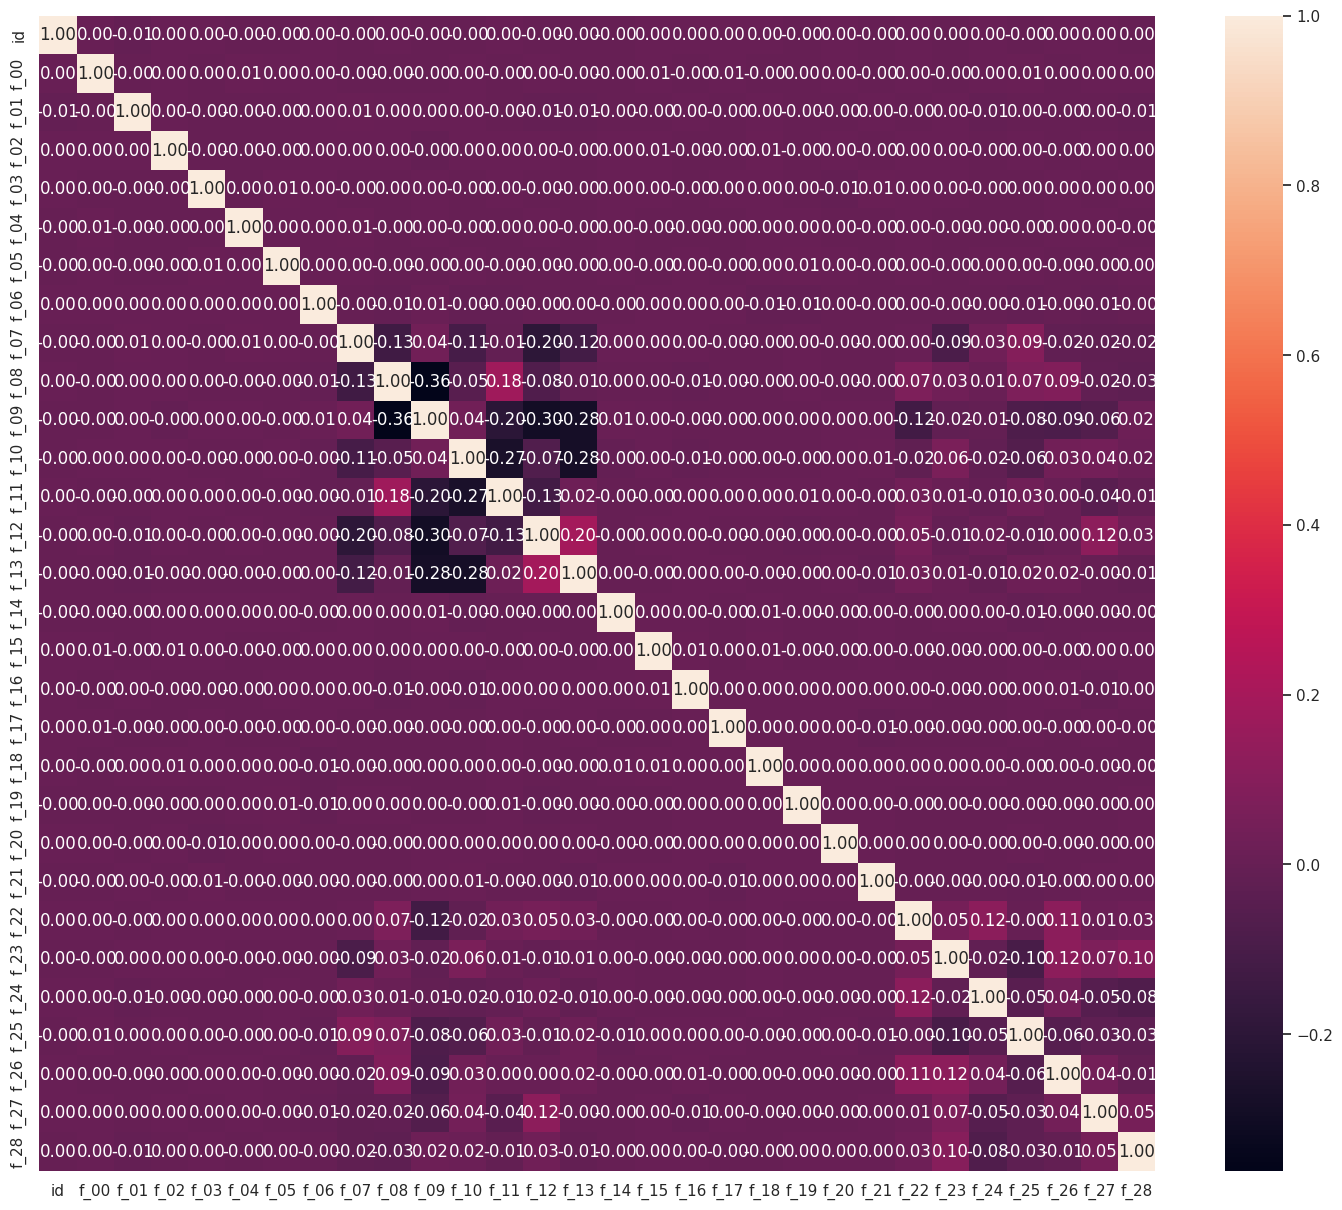

In [4]:
# Correlation matrix

sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(df.corr(),annot=True,fmt='.2f')

There is no major correlation between any of the columns.

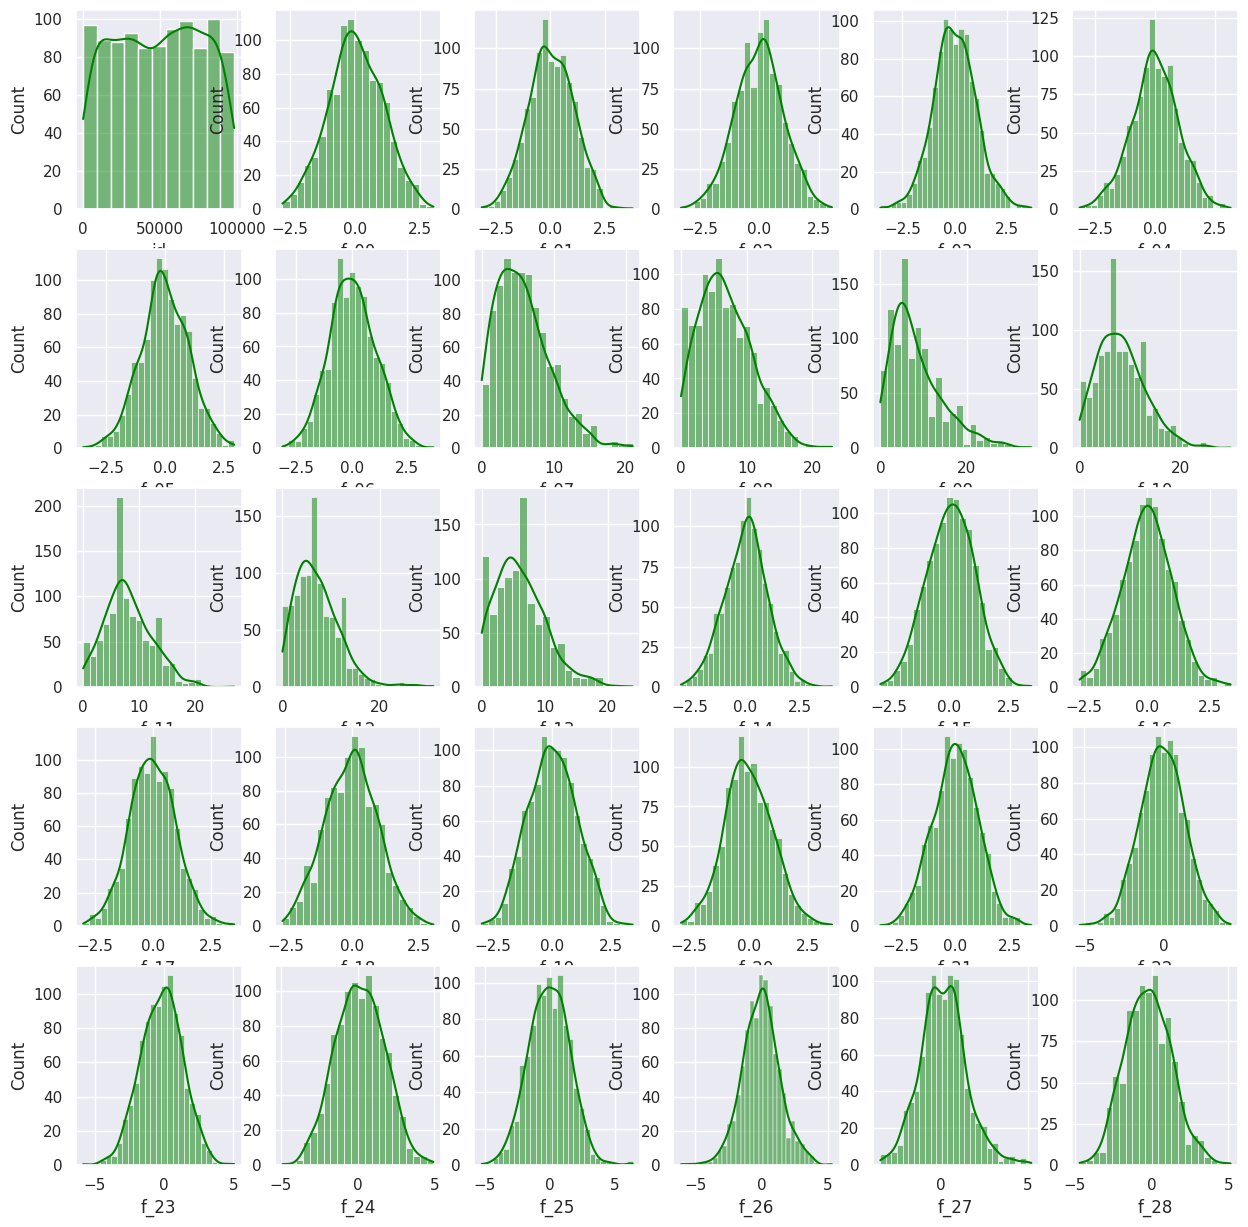

In [5]:
# Histogram plotting

sns.set(rc={'figure.figsize':(15,15)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(5,6,i)
    p=sns.histplot(x=column,data=df.sample(1000),stat='count',kde=True,color='green')

Most of the columns are distributed normally.

In [6]:
# Initialize the data set we'll work with

training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# K Means Clustering

In [7]:
# Create a K Means model

kmeans_model = KMeans(n_clusters=2)
kmeans_result = kmeans_model.fit_predict(training_data)
kmeans_clusters = unique(kmeans_result)

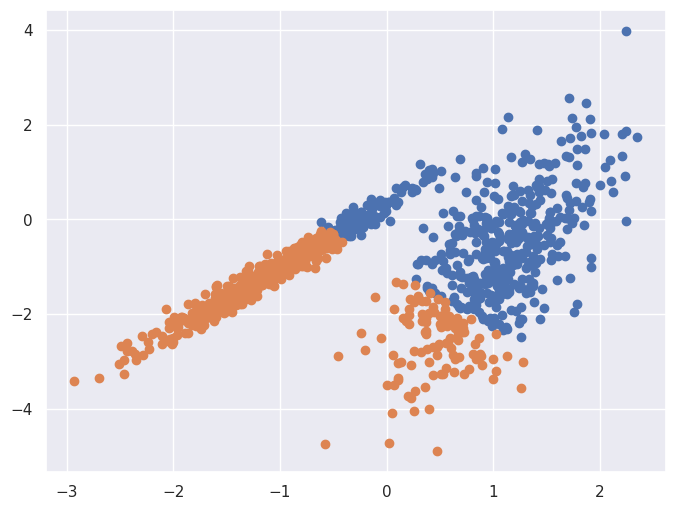

In [8]:
# Plot the result

plt.figure(figsize=(8, 6))
for dbscan_cluster in kmeans_clusters:
    index = where(kmeans_result == dbscan_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# DBSCAN

In [9]:
# Create a DBSCAN model

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(training_data)
dbscan_result = dbscan_model.labels_
dbscan_clusters = unique(dbscan_result)

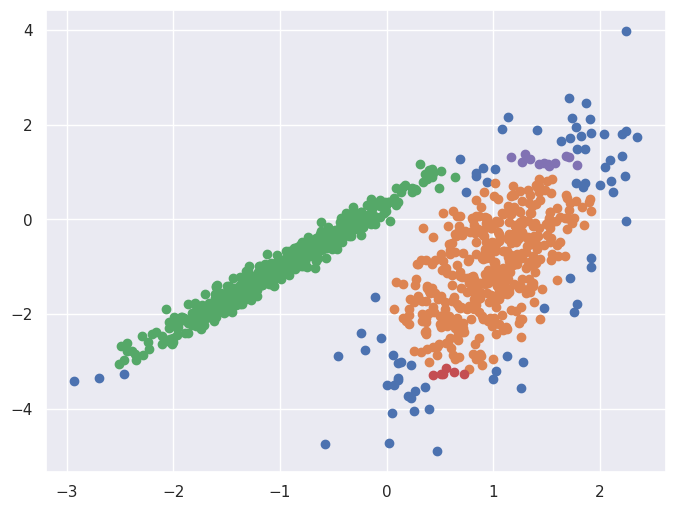

In [10]:
# Plot the result

plt.figure(figsize=(8, 6))
for dbscan_cluster in dbscan_clusters:
    index = where(dbscan_result == dbscan_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# Gaussian Mixture Model

In [11]:
# Create a Gaussian model

gaussian_model = GaussianMixture(n_components=2)
gaussian_model.fit(training_data)
gaussian_result = gaussian_model.predict(training_data)
gaussian_clusters = unique(gaussian_result)

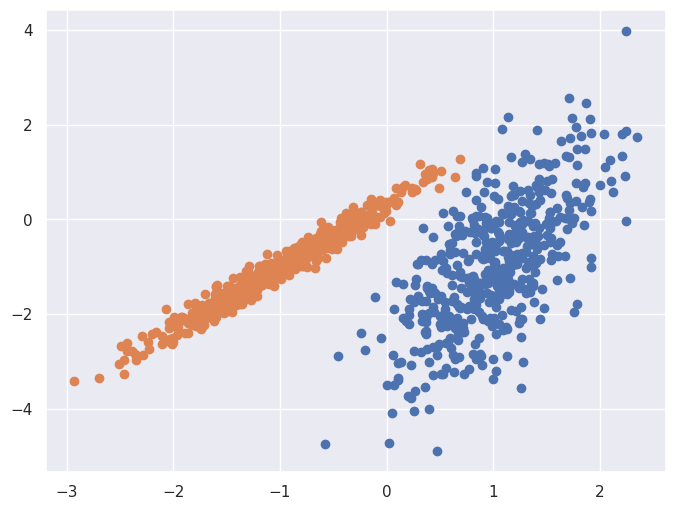

In [12]:
# Plot the result

plt.figure(figsize=(8, 6))
for gaussian_cluster in gaussian_clusters:
    index = where(gaussian_result == gaussian_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# BIRCH (Balance Iterative Reducing and Clustering using Hierarchies)

In [13]:
# Generating 600 samples using make_blobs

dataset, clusters = make_blobs(n_samples = 600, centers = 8, cluster_std = 0.75, random_state = 0)
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(dataset)
pred = model.predict(dataset)

In [14]:
# Creating the BIRCH model

model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(dataset)
pred = model.predict(dataset)

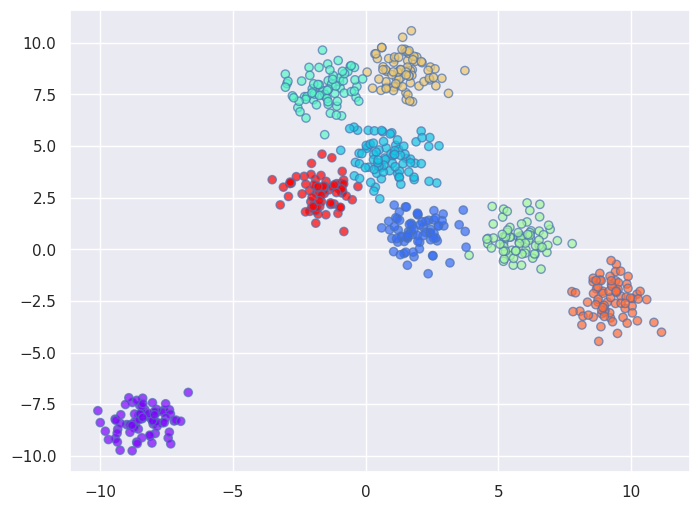

In [15]:
# Plot the result

plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

# Affinity Propagation algorithm



In [16]:
# Create an Affinity Propagation model

model = AffinityPropagation(damping=0.7)
model.fit(training_data)
result = model.predict(training_data)

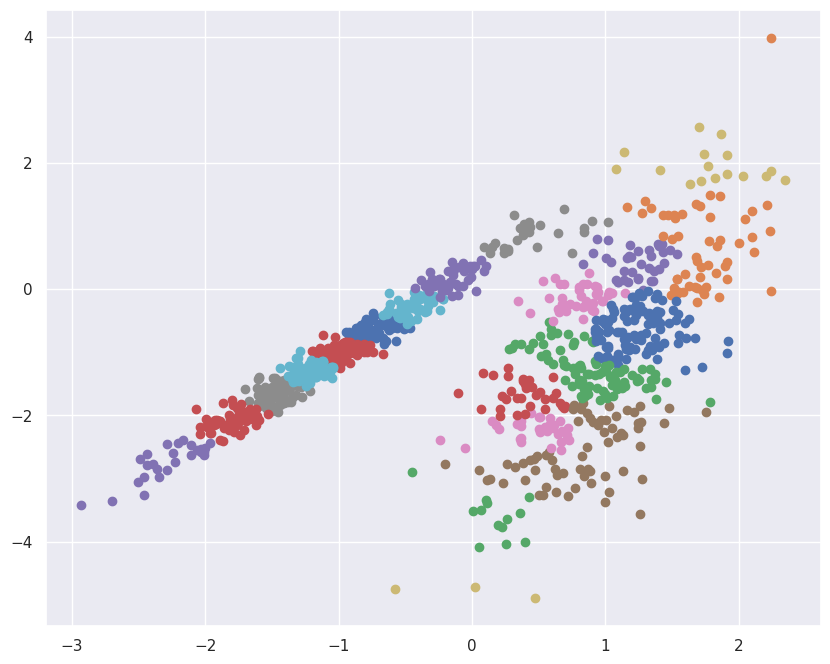

In [17]:
# Plot the result

plt.figure(figsize=(10, 8))
clusters = unique(result)
for cluster in clusters:
    index = where(result == cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# Mean Shift Clustering

In [18]:
# Create a Mean Shift Clustering model

mean_model = MeanShift()
mean_result = mean_model.fit_predict(training_data)
mean_clusters = unique(mean_result)

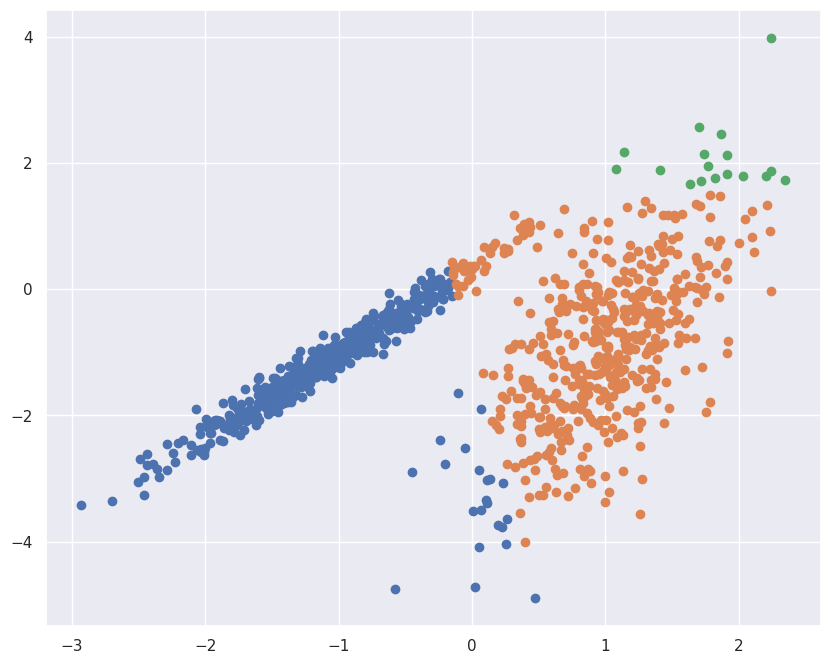

In [19]:
# Plot the result

plt.figure(figsize=(10, 8))
for mean_cluster in mean_clusters:
    index = where(mean_result == mean_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# OPTICS (Ordering Points To Identify Cluster Structure)

In [20]:
# Create an OPTICS model

optics_model = OPTICS(eps=0.75, min_samples=10)
optics_result = optics_model.fit_predict(training_data)
optics_clusters = unique(optics_result)

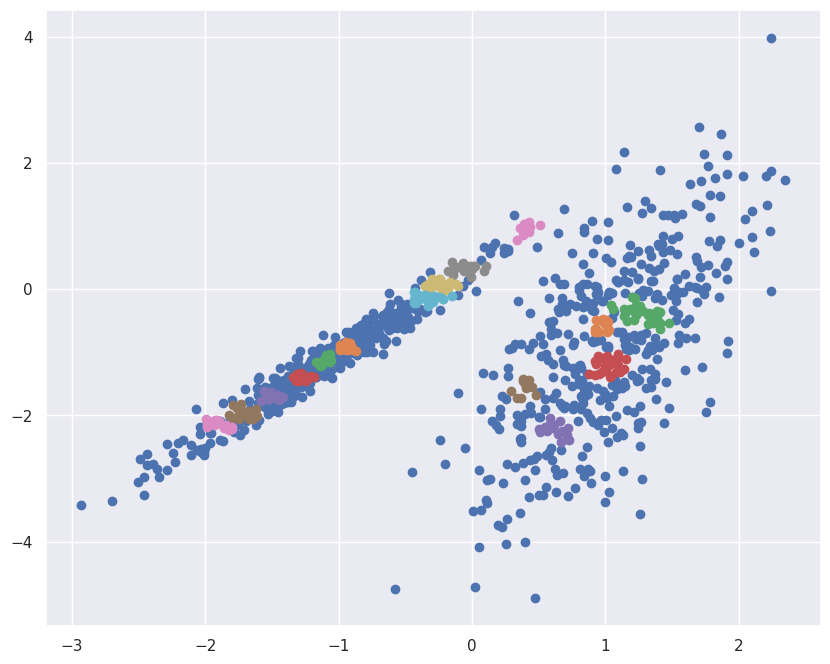

In [21]:
# Plot the result

plt.figure(figsize=(10, 8))
for optics_cluster in optics_clusters:
    index = where(optics_result == optics_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# Agglomerative Hierarchy

In [22]:
# Create a Agglomerative Hierarchy model

agglomerative_model = AgglomerativeClustering(n_clusters=2)
agglomerative_result = agglomerative_model.fit_predict(training_data)
agglomerative_clusters = unique(agglomerative_result)

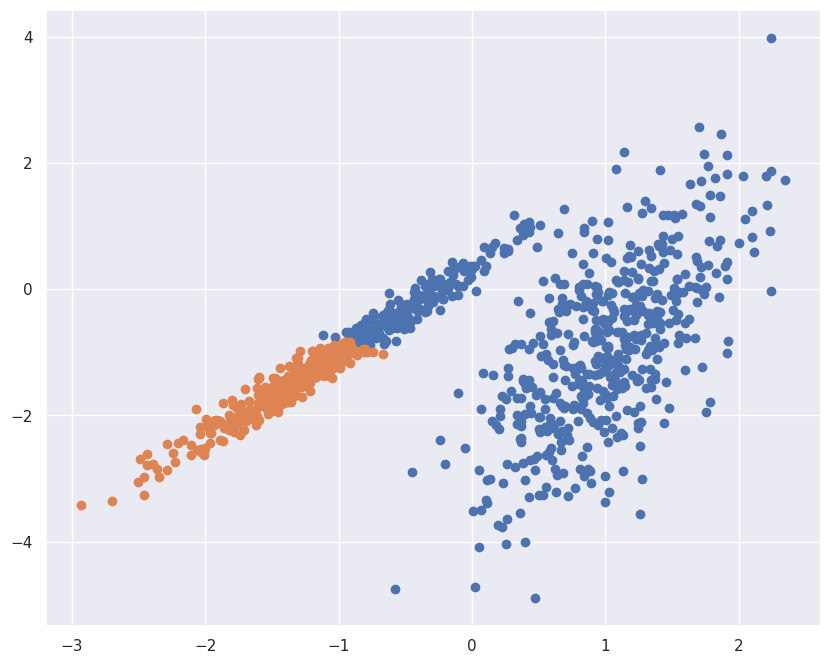

In [23]:
# Plot the result

plt.figure(figsize=(10, 8))
for agglomerative_cluster in agglomerative_clusters:
    index = where(agglomerative_result == agglomerative_cluster)
    plt.scatter(training_data[index, 0], training_data[index, 1])
plt.show()

# Fuzzy C Means algorithm

In [24]:
# Create a Fuzzy C Means cluster centers and colours

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
centers = [[4, 2],
           [1, 7],
           [5, 6]]
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

In [25]:
# Generate test data

np.random.seed(69)
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))


Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

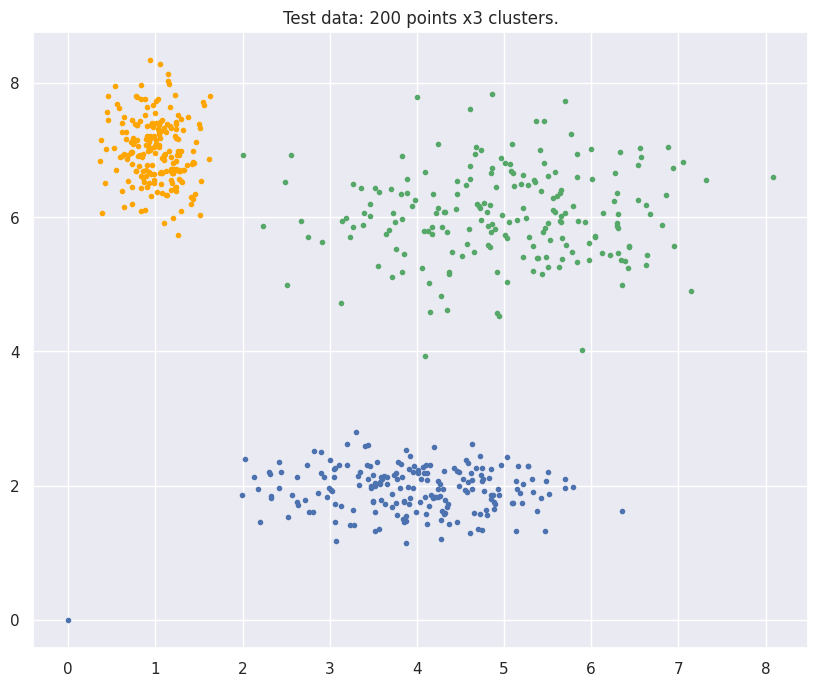

In [26]:
# Plot the results

fig0, ax0 = plt.subplots(figsize=(10, 8))
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')